<a href="https://colab.research.google.com/github/mohamedabedrabo/Disease_Prediction_ML_WebApp/blob/main/1_TL_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Transfer Learning:**

Is a deep learning technique where we use pre trained model.
Examples : VGG-16, ResNet50, Inceptionv3, MobileNet V2

#### Worklow:

Dataset import > Image processing > Train test split > Pre trained model > Make predictions.

##**1. Data import and configuration**

#### Preparation:

In [1]:
# Install library:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Environment:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#### Data Import:

In [4]:
# Kaggle API :
!kaggle competitions download -c dogs-vs-cats

 98% 798M/812M [00:06<00:00, 136MB/s]
100% 812M/812M [00:06<00:00, 128MB/s]


#### Extracting zip file:

In [5]:
# The main file:
from zipfile import ZipFile
dataset = 'dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Dataset imported')

Dataset imported


In [6]:
# The train file:
from zipfile import ZipFile
dataset = 'train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Dataset imported')

Dataset imported


#### Counting number of files in train folder:

In [7]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number od images: ', file_count)
# We are not using all the images because we are using a pre trained model

Number od images:  25000


#### Printing the name of images:

In [8]:
# As we can see we have dogs and cats image names
file_names = os.listdir('/content/train')
print(file_names)

['cat.7343.jpg', 'dog.712.jpg', 'dog.10685.jpg', 'dog.8418.jpg', 'dog.2973.jpg', 'cat.11936.jpg', 'cat.3370.jpg', 'cat.4754.jpg', 'dog.11715.jpg', 'dog.9564.jpg', 'cat.645.jpg', 'cat.10590.jpg', 'dog.6767.jpg', 'dog.1311.jpg', 'cat.12130.jpg', 'cat.5007.jpg', 'dog.11070.jpg', 'cat.10648.jpg', 'cat.98.jpg', 'cat.4317.jpg', 'cat.6242.jpg', 'cat.10971.jpg', 'dog.9322.jpg', 'dog.8324.jpg', 'cat.10312.jpg', 'dog.7849.jpg', 'cat.10896.jpg', 'dog.2972.jpg', 'dog.9142.jpg', 'cat.1258.jpg', 'cat.10490.jpg', 'cat.10354.jpg', 'cat.3767.jpg', 'cat.10404.jpg', 'dog.6754.jpg', 'cat.647.jpg', 'cat.7507.jpg', 'cat.5165.jpg', 'dog.519.jpg', 'cat.2801.jpg', 'cat.12164.jpg', 'dog.7561.jpg', 'cat.20.jpg', 'dog.7852.jpg', 'cat.11997.jpg', 'dog.10073.jpg', 'dog.3236.jpg', 'dog.10675.jpg', 'cat.8785.jpg', 'cat.106.jpg', 'dog.2660.jpg', 'dog.11183.jpg', 'cat.1002.jpg', 'cat.2428.jpg', 'dog.8755.jpg', 'cat.12415.jpg', 'cat.8778.jpg', 'cat.3954.jpg', 'cat.12384.jpg', 'dog.5574.jpg', 'dog.11564.jpg', 'cat.5088.j

 ## **2. Import the libraries**

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

## **3. Data analysis**

#### Display images of cats and dogs:

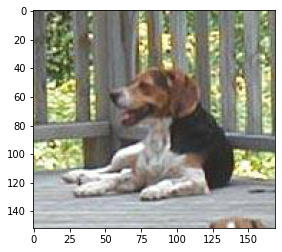

In [21]:
# Dog image :
img = mpimg.imread('/content/train/dog.712.jpg')
imgplt = plt.imshow(img)
plt.show()
# As we can see, picture size nearly 450*350 

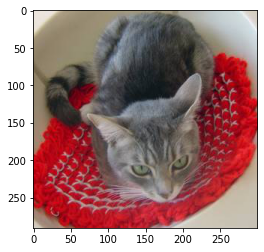

In [24]:
# Cat image :
img = mpimg.imread('/content/train/cat.7343.jpg')
imgplt = plt.imshow(img)
plt.show()
# As we can see, picture size nearly 350*500
# We need to make all images with same size later on. 

## **4.Data PreProcessing**

#### Find out number of cats / dogs images:

In [12]:
# This is the list that contains all the names of images:
file_names = os.listdir('/content/train')

# We want to print the first 5 data points:
for i in range (5):
  print(file_names[i])
# So we understand it's a string that goes like this : 'dog.1612.jpg

cat.7343.jpg
dog.712.jpg
dog.10685.jpg
dog.8418.jpg
dog.2973.jpg


In [13]:
# We can reach the type of each image (dog/cat) like this:
for i in range (5):
  name = file_names[i]
  print (name[0:3])

cat
dog
dog
dog
dog


In [14]:
# Sum how many dogs and cats images we have:
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0
for img_file in file_names:
  name = img_file[0:3]
  if name =='dog':
    dog_count+=1
  else :
    cat_count+=1
print ('Number of dog images is : ', dog_count)
print ('Number of cat images is : ', cat_count)


Number of dog images is :  12500
Number of cat images is :  12500


#### Resizing images:

In [15]:
# Create a directory for resized images:
os.mkdir('/content/image resized')

In [16]:
# Create variabels for original images folder and resized :
original_folder = '/content/train/'
resized_folder = '/content/image resized'

In [17]:
# Resizing :
for i in range(2000):
  # This filename will look like this : 'cat.11860.jpg'
  filename = os.listdir(original_folder)[i]
  # this path will look like this : '/content/train/cat.11860.jpg'
  img_path = original_folder+filename

  # Resizing with 'Image' method we imported:
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert("RGB")
  

  # Setting new path for the resized image :.
  newImgPath = resized_folder+'/'+filename
  img.save(newImgPath)

#### Display resized images that we viewed before:

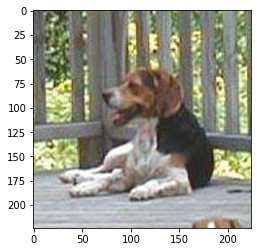

In [22]:
# Dog image :
# And we can see it has a differenet size:
img = mpimg.imread('/content/image resized/dog.712.jpg')
imgplt = plt.imshow(img)
plt.show()

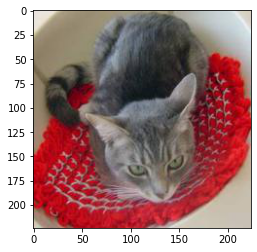

In [25]:
# Cat image :
# And we can see it has a smaller size:
img2 = mpimg.imread('/content/image resized/cat.7343.jpg')
imgplt = plt.imshow(img2)
plt.show()

#### Give labels to the images (1 dog, 0 cat):

In [26]:
# The path of our images:
filenames = os.listdir('/content/image resized/')

# Create an empty list for the labels:
labels = []

# Append the labels to the list:
for i in range (2000):
  file_name = filenames[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else :
    labels.append(0)

In [27]:
# Print first 5 names "
print(filenames[0:5])

['cat.7343.jpg', 'dog.712.jpg', 'dog.10685.jpg', 'dog.8418.jpg', 'dog.2973.jpg']


In [28]:
# Print first 5 labels :
print(labels[0:5])

[0, 1, 1, 1, 1]


#### Check how many cats and dogs are in our sample:

In [29]:
# First way : 
# We can see that we have almost an even distribution:
dog_count = 0
cat_count = 0
for label in labels:
  if label == 1:
    dog_count+=1
  else :
    cat_count+=1
print ('Number of dog images is : ', dog_count)
print ('Number of cat images is : ', cat_count)

Number of dog images is :  1020
Number of cat images is :  980


In [30]:
# Second way using numpy :
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[ 980 1020]


#### Convert resized images to numpy array:

In [31]:
import cv2
import glob

In [32]:
# Specify the directory :
image_directory = '/content/image resized/'

# Image extension (important for other cases but important) :
image_extension = ['png', 'jpg']

In [33]:
# Create empty list:
files =[]

# Fill the list with images:
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

# Reading the files to numpy array:
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [34]:
# Review shape and type of the array :
print (type(dog_cat_images))
print (dog_cat_images.shape)
# 2000 images, 24*24 pixles, 3 means RGB images

<class 'numpy.ndarray'>
(2000, 224, 224, 3)


In [35]:
# Review numpy array :
print (dog_cat_images[0])

[[[224 227 235]
  [223 226 234]
  [223 226 234]
  ...
  [189 207 214]
  [192 208 215]
  [192 208 215]]

 [[224 227 235]
  [223 226 234]
  [223 226 234]
  ...
  [189 207 214]
  [192 208 215]
  [192 208 215]]

 [[224 227 235]
  [223 226 234]
  [223 226 234]
  ...
  [191 207 214]
  [194 207 215]
  [194 207 215]]

 ...

 [[187 198 225]
  [184 197 219]
  [182 198 211]
  ...
  [181 192 200]
  [181 192 200]
  [181 192 200]]

 [[189 198 225]
  [188 199 221]
  [188 202 214]
  ...
  [181 192 200]
  [181 192 200]
  [181 192 200]]

 [[187 196 223]
  [189 200 220]
  [190 204 216]
  ...
  [181 192 200]
  [181 192 200]
  [181 192 200]]]


## **5. Train Test Split**

#### Set labels and features:

In [36]:
X = dog_cat_images
Y = np.asarray(labels)

#### Train test split:

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#### Shapes:

In [40]:
X_train.shape

(1600, 224, 224, 3)

In [41]:
X_test.shape

(400, 224, 224, 3)

In [42]:
Y_train.shape

(1600,)

In [43]:
Y_test.shape

(400,)

## **6. Scaling the Data**

In [44]:
# Pixel values are between 0>255 (black>white), so we devide by 255
# In order to get values between 0 and 1 for all values
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [45]:
print (X_train_scaled[0])

[[[0.78823529 0.76078431 0.68235294]
  [0.78431373 0.75686275 0.67843137]
  [0.78039216 0.75294118 0.6745098 ]
  ...
  [0.75294118 0.71764706 0.63921569]
  [0.75294118 0.71764706 0.63921569]
  [0.75686275 0.72156863 0.64313725]]

 [[0.78431373 0.75294118 0.6627451 ]
  [0.77254902 0.74901961 0.65882353]
  [0.78039216 0.74901961 0.65882353]
  ...
  [0.75294118 0.71764706 0.63921569]
  [0.75294118 0.71764706 0.63921569]
  [0.75686275 0.72156863 0.64313725]]

 [[0.78823529 0.74901961 0.65490196]
  [0.78039216 0.75294118 0.65490196]
  [0.78823529 0.74901961 0.65490196]
  ...
  [0.76470588 0.72156863 0.63529412]
  [0.76470588 0.72156863 0.63529412]
  [0.76078431 0.71764706 0.63137255]]

 ...

 [[0.25098039 0.4        0.47058824]
  [0.2627451  0.41176471 0.48235294]
  [0.37647059 0.51764706 0.58039216]
  ...
  [0.54117647 0.58823529 0.61176471]
  [0.52156863 0.57254902 0.60392157]
  [0.43921569 0.50196078 0.5254902 ]]

 [[0.2        0.35686275 0.42745098]
  [0.16470588 0.31372549 0.38431373]


## **7. Run ML Model- Neural Network**

In [46]:
# As we mentioned earlier we're going to use pre-trained model
# The model is here : https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
import tensorflow as tf
import tensorflow_hub as hub

#### Prepare the model:

In [47]:
mobile_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [48]:
# 224,224,3 is RGB shape
pretrained_model = hub.KerasLayer(mobile_model, input_shape = (224,224,3), trainable=False)

In [49]:
# number of classes is how many types of images we have:
num_of_classes = 2

#Building the model:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [50]:
# Compile the model:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

#### Train the Model:

In [51]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 43s 767ms/step - loss: 0.2319 - acc: 0.9112
Epoch 2/5
50/50 [==============================] - 38s 751ms/step - loss: 0.0672 - acc: 0.9744
Epoch 3/5
50/50 [==============================] - 39s 783ms/step - loss: 0.0460 - acc: 0.9819
Epoch 4/5
50/50 [==============================] - 38s 761ms/step - loss: 0.0333 - acc: 0.9919
Epoch 5/5
50/50 [==============================] - 38s 753ms/step - loss: 0.0276 - acc: 0.9931


#### Check accuracy:

In [53]:
# We know accuracy for train data is 0.9931, now for test data:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss = ', score)
print('Test Accuracy ', acc)

13/13 [==============================] - 10s 708ms/step - loss: 0.0579 - acc: 0.9825
Test Loss =  0.05790920555591583
Test Accuracy  0.9825000166893005


## **8. Building Predictive System based on our model**

Path of the image to be predicted: /content/test_image.JPG


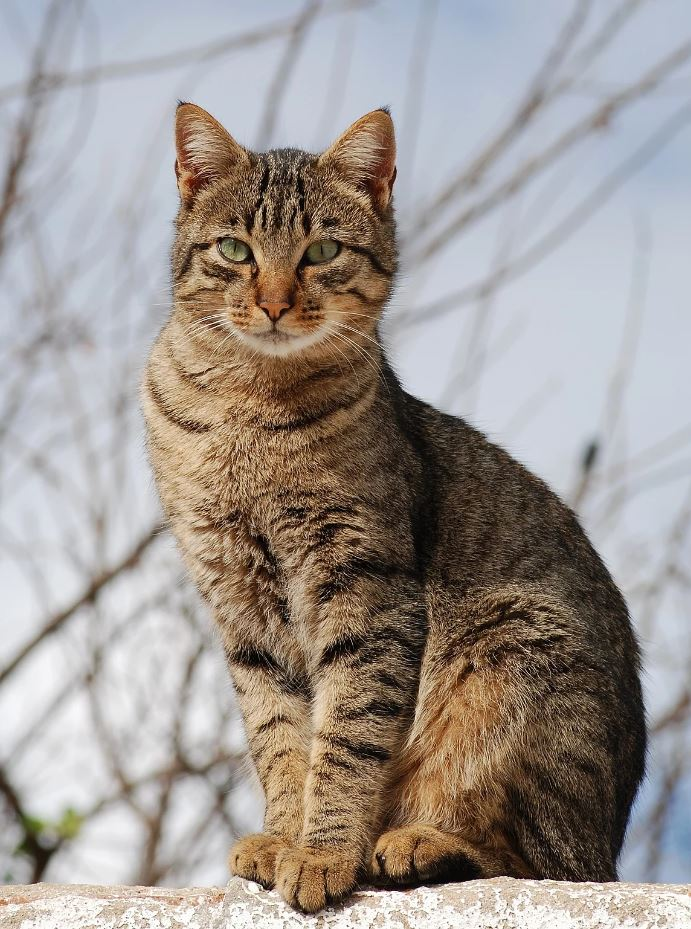

Its a Cat


In [55]:
# Read the input from the user : 
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

# Resize to fit our model:
input_image_resize = cv2.resize(input_image, (224,224))

# Scale the image :
input_image_scaled = input_image_resize/225

# Reshape to tell the model to predict for 1 image:
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

# Make prediction :
input_prediction = model.predict(image_reshaped)

# The prediction will be like this [0.85, 0.2]
# 85% it's 0 and 20% it's 1 so this is to return 0 or 1:
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0 :
  print('Its a Cat')
else : 
  print('Its a Dog')